4. Look for patterns in referrals and re-referrals on the basis of the following:
    - Age
    - Referral source
    - Socioeconomic status (County SES)

descriptives of age of referral (mean, median, min, max, histogram)
descriptives of age of re-referral (mean, median, min, max, histogram)
percentage breakdown of referrals and re-referrals by referral source (e.g. PCP: 20%, foster parent: 15%)
breakdown of referrals by county SES (e.g. attainment: 30%, at-risk:20%)
child retention by county SES (avg. length of being in the program)    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

%matplotlib inline

In [3]:
import re

In [4]:
clean_data=pd.read_csv('../../data/teis_final_data.csv')

In [5]:
clean_data

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unable to contact,2010-01-25,DCS,2018
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaN,NaN,NaN,NaN,NaN,Unable to contact,2016-08-31,PCP,2016
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Rene Bard,2016-07-12,Ineligible,8/25/2016,NaN,NaN,Ineligible for Part C,2016-08-25,Parent,2016
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Jennifer Terranera - 45 days,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-15,Parent,2016
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Anna Bolin,2016-08-15,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115520,531593,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115521,531594,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Health Care Provider,2022
115522,531595,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,2022


In [6]:
clean_data.columns

Index(['Child ID', 'Notification Date', 'Fiscal Year', 'Notification Month',
       'Tenn Region', 'Fiscal Year.1', 'third_DOB', 'Late Referral', 'Qtr',
       'POE', 'DOB', 'County Name', 'County SES', 'Child Phase', 'Active',
       'Service Coordinator', 'Parent Consent', 'Initial Eligibility',
       'Initial Eligibility Date', 'Initial IFSP Date', 'Latest IFSP',
       'Exit Reason', 'Exit Date', 'Referral Source Type Name', 'Year'],
      dtype='object')

In [7]:
clean_data['Notification Date']=pd.to_datetime(clean_data['Notification Date'])
clean_data['DOB']=pd.to_datetime(clean_data['DOB'])

In [8]:
clean_data.dtypes

Child ID                              int64
Notification Date            datetime64[ns]
Fiscal Year                          object
Notification Month                   object
Tenn Region                          object
Fiscal Year.1                       float64
third_DOB                            object
Late Referral                       float64
Qtr                                 float64
POE                                  object
DOB                          datetime64[ns]
County Name                          object
County SES                           object
Child Phase                          object
Active                               object
Service Coordinator                  object
Parent Consent                       object
Initial Eligibility                  object
Initial Eligibility Date             object
Initial IFSP Date                    object
Latest IFSP                          object
Exit Reason                          object
Exit Date                       

In [9]:
clean_data = clean_data.rename(columns = {'Notification Date':'notif_date'})
clean_data.columns

Index(['Child ID', 'notif_date', 'Fiscal Year', 'Notification Month',
       'Tenn Region', 'Fiscal Year.1', 'third_DOB', 'Late Referral', 'Qtr',
       'POE', 'DOB', 'County Name', 'County SES', 'Child Phase', 'Active',
       'Service Coordinator', 'Parent Consent', 'Initial Eligibility',
       'Initial Eligibility Date', 'Initial IFSP Date', 'Latest IFSP',
       'Exit Reason', 'Exit Date', 'Referral Source Type Name', 'Year'],
      dtype='object')

In [10]:
#dt.days extracts only the days as an int from the result of notif_date-DOB which is actually a timedelta which under the hood is in like millions of seconds
clean_data = clean_data[(((clean_data['notif_date']-clean_data['DOB']).dt.days) > 0) & (((clean_data['notif_date']-clean_data['DOB']).dt.days) < 1095)]
clean_data

,Child ID,notif_date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaN,NaN,NaN,NaN,NaN,Unable to contact,2016-08-31,PCP,2016
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Rene Bard,2016-07-12,Ineligible,8/25/2016,NaN,NaN,Ineligible for Part C,2016-08-25,Parent,2016
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Jennifer Terranera - 45 days,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-15,Parent,2016
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Anna Bolin,2016-08-15,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016
5,353900,2016-09-29,2016-2017,Sep,Western,2016.0,2016-10-09,1.0,1.0,MD,...,JoAnn Hinkle-DA,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-29,Parent,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115520,531593,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PCP,2022
115521,531594,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Health Care Provider,2022
115522,531595,2022-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GN,...,Kim Correll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital,2022


In [11]:
age = clean_data[['notif_date','DOB','POE','Child ID','County Name','County SES']]
age

,notif_date,DOB,POE,Child ID,County Name,County SES
1,2016-08-17,2013-10-15,UC,350065,Jackson,At-Risk
2,2016-07-12,2013-11-13,NW,351755,Madison,Transitional
3,2016-09-14,2013-10-01,FT,353800,Hawkins,At-Risk
4,2016-08-05,2013-12-04,UC,353805,Putnam,Transitional
5,2016-09-29,2013-10-09,MD,353900,Shelby,Transitional
...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,GN,531592,Montgomery,Transitional
115520,2022-07-01,2021-12-07,GN,531593,Davidson,Competitive
115521,2022-07-01,2022-06-21,GN,531594,Montgomery,Transitional
115522,2022-07-01,2022-06-17,GN,531595,Davidson,Competitive


In [12]:
age.dtypes

notif_date     datetime64[ns]
DOB            datetime64[ns]
POE                    object
Child ID                int64
County Name            object
County SES             object
dtype: object

In [26]:
age['kids_age'] = (age['notif_date'] - age['DOB'])
age['kids_age'] = age['kids_age'].dt.days

/tmp/ipykernel_86206/1334366676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['kids_age'] = (age['notif_date'] - age['DOB'])
/tmp/ipykernel_86206/1334366676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['kids_age'] = age['kids_age'].dt.days


In [27]:
age.dtypes

notif_date     datetime64[ns]
DOB            datetime64[ns]
POE                    object
Child ID                int64
County Name            object
County SES             object
kids_age                int64
dtype: object

In [28]:
age.describe()

,Child ID,kids_age
count,115473.000000,115473.000000
mean,464304.753094,468.129762
std,37683.671736,319.859844
min,350065.000000,1.000000
25%,430013.000000,138.000000
50%,465866.000000,503.000000
75%,496014.000000,742.000000
max,531596.000000,1094.000000


In [20]:
age

,notif_date,DOB,POE,Child ID,County Name,County SES,kids_age
1,2016-08-17,2013-10-15,UC,350065,Jackson,At-Risk,1037 days
2,2016-07-12,2013-11-13,NW,351755,Madison,Transitional,972 days
3,2016-09-14,2013-10-01,FT,353800,Hawkins,At-Risk,1079 days
4,2016-08-05,2013-12-04,UC,353805,Putnam,Transitional,975 days
5,2016-09-29,2013-10-09,MD,353900,Shelby,Transitional,1086 days
...,...,...,...,...,...,...,...
115519,2022-07-01,2020-05-20,GN,531592,Montgomery,Transitional,772 days
115520,2022-07-01,2021-12-07,GN,531593,Davidson,Competitive,206 days
115521,2022-07-01,2022-06-21,GN,531594,Montgomery,Transitional,10 days
115522,2022-07-01,2022-06-17,GN,531595,Davidson,Competitive,14 days


([<matplotlib.axis.XTick at 0x7f4f8688eb80>,
 [Text(0, 0, '0 mo'),
  Text(182, 0, '6 mo'),
  Text(365, 0, '12 mo'),
  Text(547, 0, '18 mo'),
  Text(730, 0, '24 mo'),
  Text(912, 0, '30 mo'),
  Text(1095, 0, '36 mo')])

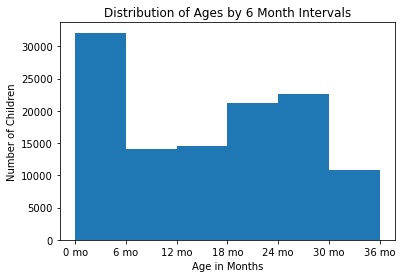

In [51]:
plt.hist(age.kids_age, bins = [0, 182, 365, 547, 730, 912, 1095])
plt.title('Distribution of Ages by 6 Month Intervals')
plt.xlabel('Age in Months')
plt.ylabel('Number of Children')
plt.xticks(ticks=[0, 182, 365, 547, 730, 912, 1095], labels=['0 mo', '6 mo', '12 mo', '18 mo', '24 mo', '30 mo', '36 mo'])